1. Cài đặt / imports & đọc dữ liệu

In [2]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA_PATH = r'D:\NCKK\PYHTON_NCKH\NCKK_PYTHON\Tran_Co\Programe\CA_Weather_Fire_Dataset.csv'  # sửa đường dẫn nếu cần
print('File exists:', os.path.exists(DATA_PATH))
df = pd.read_csv(DATA_PATH)
print('Kích thước dữ liệu:', df.shape)
df.head()


File exists: True
Kích thước dữ liệu: (14976, 14)


,DATE,PRECIPITATION,MAX_TEMP,MIN_TEMP,AVG_WIND_SPEED,FIRE_START_DAY,YEAR,TEMP_RANGE,WIND_TEMP_RATIO,MONTH,SEASON,LAGGED_PRECIPITATION,LAGGED_AVG_WIND_SPEED,DAY_OF_YEAR
0,1984-01-01,0.0,79.0,51.0,4.70,False,1984,28.0,0.059494,1,Winter,0.0,4.700,1
1,1984-01-02,0.0,71.0,46.0,5.59,False,1984,25.0,0.078732,1,Winter,0.0,5.145,2
2,1984-01-03,0.0,70.0,47.0,5.37,False,1984,23.0,0.076714,1,Winter,0.0,5.220,3
3,1984-01-04,0.0,76.0,45.0,4.70,False,1984,31.0,0.061842,1,Winter,0.0,5.090,4
4,1984-01-05,0.0,74.0,49.0,5.14,False,1984,25.0,0.069459,1,Winter,0.0,5.100,5


2. Kiểm tra nhanh cấu trúc & tìm cột diện tích cháy

In [4]:
# Cell 2: Kiểm tra cột
cols = df.columns.tolist()
print('Columns:', cols)

# tự động tìm cột burn/area/fire nếu có
burn_col = None
for c in cols:
    if any(k in c.lower() for k in ['burn', 'area', 'burned', 'fire_size', 'size']):
        burn_col = c
        break
print('Ứng viên cột diện tích cháy:', burn_col)

# nếu tìm thấy, show mô tả
if burn_col:
    display(df[burn_col].describe())
else:
    display(df.describe(include='all').transpose().head(40))


Columns: ['DATE', 'PRECIPITATION', 'MAX_TEMP', 'MIN_TEMP', 'AVG_WIND_SPEED', 'FIRE_START_DAY', 'YEAR', 'TEMP_RANGE', 'WIND_TEMP_RATIO', 'MONTH', 'SEASON', 'LAGGED_PRECIPITATION', 'LAGGED_AVG_WIND_SPEED', 'DAY_OF_YEAR']
Ứng viên cột diện tích cháy: None


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DATE,14976,14976,1984-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRECIPITATION,14976.0,NaN,NaN,NaN,0.032338,0.179607,0.0,0.0,0.0,0.0,4.53
MAX_TEMP,14976.0,NaN,NaN,NaN,70.540932,7.261989,50.0,65.0,70.0,75.0,106.0
MIN_TEMP,14976.0,NaN,NaN,NaN,56.499666,6.766055,33.0,51.0,57.0,62.0,77.0
AVG_WIND_SPEED,14976.0,NaN,NaN,NaN,7.435098,2.129985,1.79,6.04,7.16,8.5,26.17
FIRE_START_DAY,14976,2,False,10005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEAR,14976.0,NaN,NaN,NaN,2004.00601,11.837186,1984.0,1994.0,2004.0,2014.0,2025.0
TEMP_RANGE,14976.0,NaN,NaN,NaN,14.041266,5.996128,2.0,10.0,12.0,17.0,41.0
WIND_TEMP_RATIO,14976.0,NaN,NaN,NaN,0.107019,0.03563,0.023553,0.085238,0.102222,0.120462,0.459123
MONTH,14976.0,NaN,NaN,NaN,6.518096,3.449663,1.0,4.0,7.0,10.0,12.0


3. Tạo cột Burned_Area chuẩn và phân loại mức độ cháy (Fire_Level)

In [5]:
# 1️⃣ Xác định biến "is_fire" dựa vào FIRE_START_DAY
# - Nếu FIRE_START_DAY có giá trị (ngày cụ thể) → có cháy (1)
# - Nếu NaN → không cháy (0)
df['is_fire'] = df['FIRE_START_DAY'].notnull().astype(int)

# 2️⃣ Tạo cột Burned_Area giả định = is_fire để tương thích với pipeline cũ
df['Burned_Area'] = df['is_fire']

# 3️⃣ Tạo cột Fire_Level (mức độ cháy / nguy cơ cháy)
# Chúng ta chia mức độ dựa vào 3 yếu tố thời tiết quan trọng:
#   - Nhiệt độ trung bình (AVG_TEMP = (MAX_TEMP + MIN_TEMP) / 2)
#   - Lượng mưa (PRECIPITATION)
#   - Tốc độ gió trung bình (AVG_WIND_SPEED)
df['AVG_TEMP'] = (df['MAX_TEMP'] + df['MIN_TEMP']) / 2

def classify_fire_risk(row):
    temp = row['AVG_TEMP']
    rain = row['PRECIPITATION']
    wind = row['AVG_WIND_SPEED']
    
    # Logic phân loại nguy cơ cháy (giả lập dựa trên ngưỡng khí tượng)
    if rain > 10:
        return "Rất thấp"  # mưa nhiều -> ẩm -> ít cháy
    elif temp < 25 and rain > 5:
        return "Thấp"
    elif 25 <= temp < 32 and 2 < rain <= 5 and wind < 3:
        return "Trung bình"
    elif 32 <= temp < 38 and rain <= 2 and wind >= 3:
        return "Cao"
    else:
        return "Rất cao"

# Áp dụng logic
df['Fire_Level'] = df.apply(classify_fire_risk, axis=1)

# 4️⃣ Kiểm tra thống kê phân bố
print("Phân bố Fire_Level:")
display(df['Fire_Level'].value_counts())

# 5️⃣ Hiển thị vài dòng đầu để kiểm tra
df[['DATE','MAX_TEMP','MIN_TEMP','PRECIPITATION','AVG_WIND_SPEED','is_fire','Fire_Level']].head(10)


Phân bố Fire_Level:


Fire_Level
Rất cao    14976
Name: count, dtype: int64

,DATE,MAX_TEMP,MIN_TEMP,PRECIPITATION,AVG_WIND_SPEED,is_fire,Fire_Level
0,1984-01-01,79.0,51.0,0.0,4.70,1,Rất cao
1,1984-01-02,71.0,46.0,0.0,5.59,1,Rất cao
2,1984-01-03,70.0,47.0,0.0,5.37,1,Rất cao
3,1984-01-04,76.0,45.0,0.0,4.70,1,Rất cao
4,1984-01-05,74.0,49.0,0.0,5.14,1,Rất cao
5,1984-01-06,65.0,49.0,0.0,7.38,1,Rất cao
6,1984-01-07,59.0,54.0,0.0,5.82,1,Rất cao
7,1984-01-08,59.0,55.0,0.0,3.36,1,Rất cao
8,1984-01-09,61.0,54.0,0.0,6.71,1,Rất cao
9,1984-01-10,70.0,47.0,0.0,4.70,1,Rất cao


4. EDA — trực quan & heatmap tương quan

✅ Đọc dữ liệu thành công!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14976 entries, 0 to 14975
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DATE                   14976 non-null  object 
 1   PRECIPITATION          14976 non-null  float64
 2   MAX_TEMP               14976 non-null  float64
 3   MIN_TEMP               14976 non-null  float64
 4   AVG_WIND_SPEED         14976 non-null  float64
 5   FIRE_START_DAY         14976 non-null  bool   
 6   YEAR                   14976 non-null  int64  
 7   TEMP_RANGE             14976 non-null  float64
 8   WIND_TEMP_RATIO        14976 non-null  float64
 9   MONTH                  14976 non-null  int64  
 10  SEASON                 14976 non-null  object 
 11  LAGGED_PRECIPITATION   14976 non-null  float64
 12  LAGGED_AVG_WIND_SPEED  14976 non-null  float64
 13  DAY_OF_YEAR            14976 non-null  int64  
dtypes: bool(1), float64(8), int6

C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


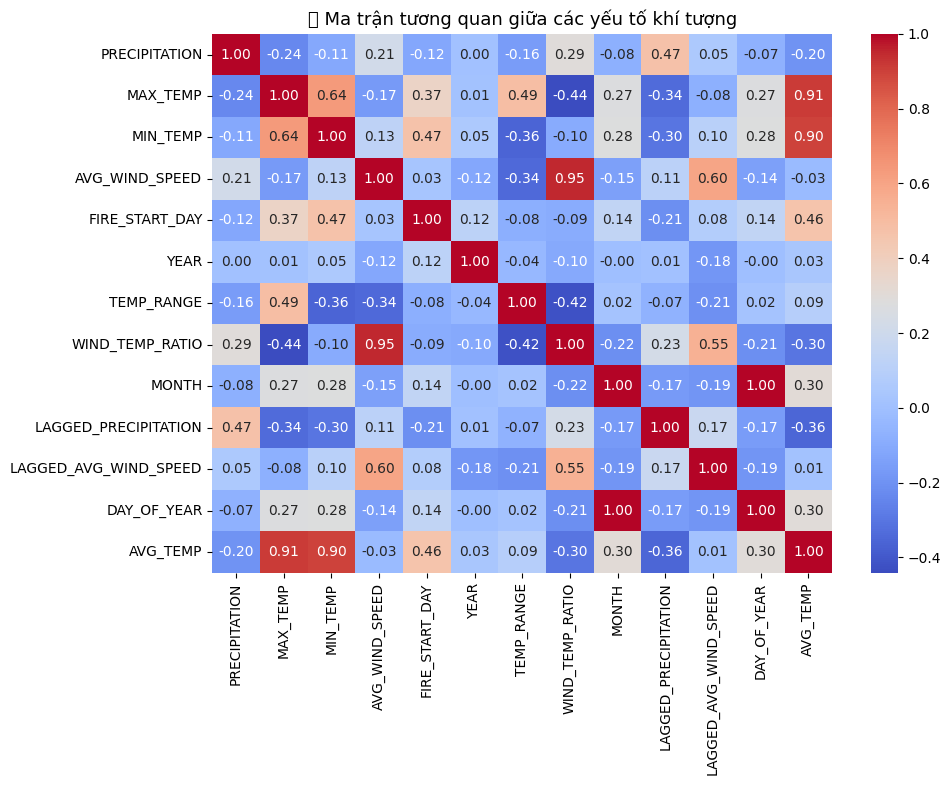

C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128168 (\N{DASH SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


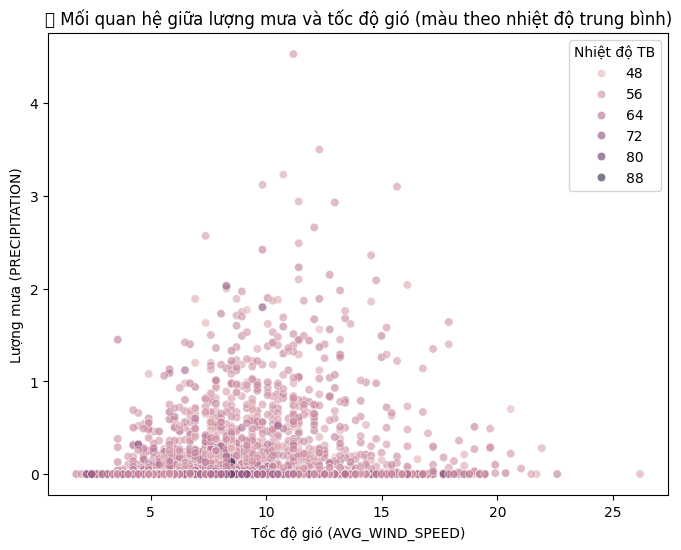

C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


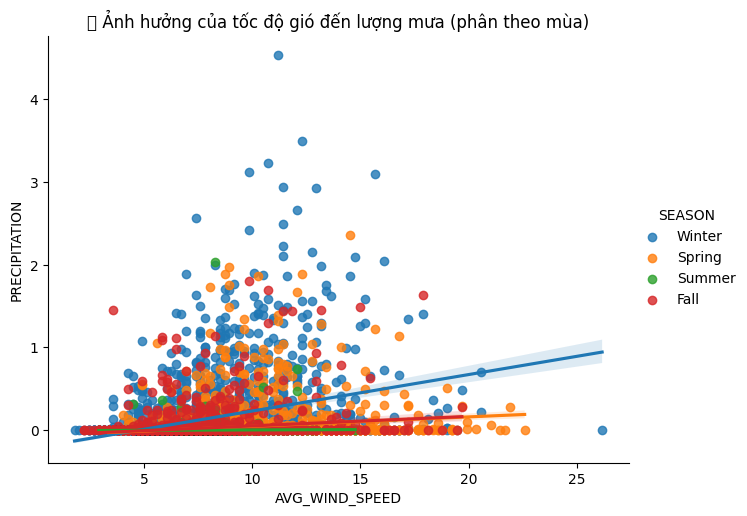

C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


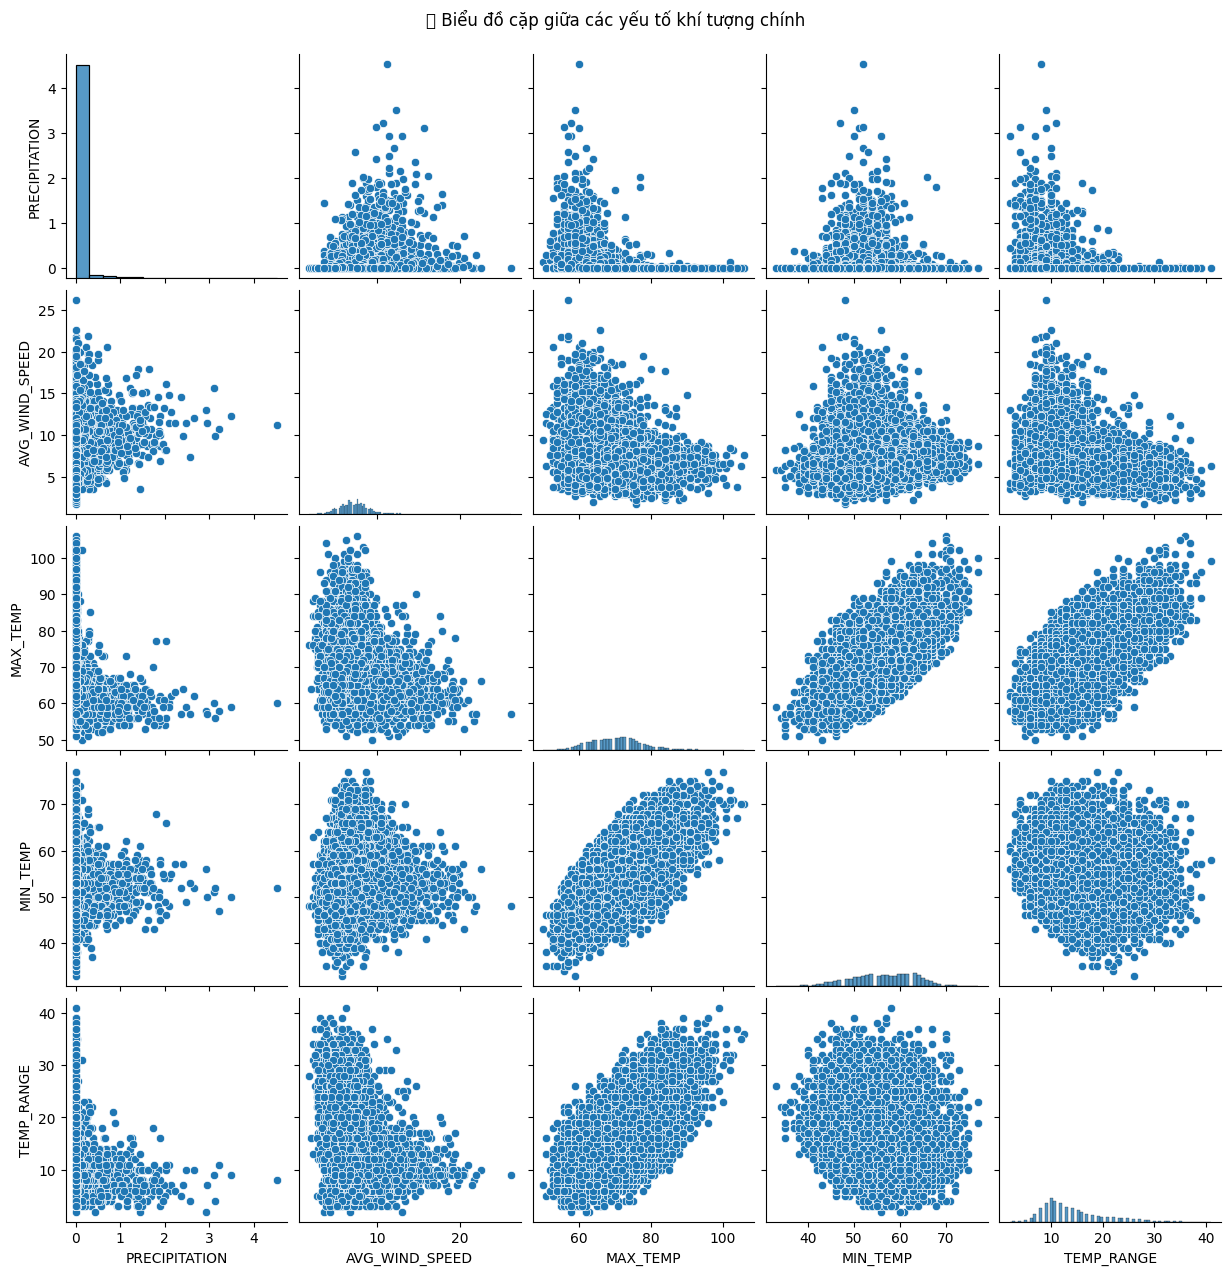

C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127786 (\N{CLOUD WITH TORNADO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


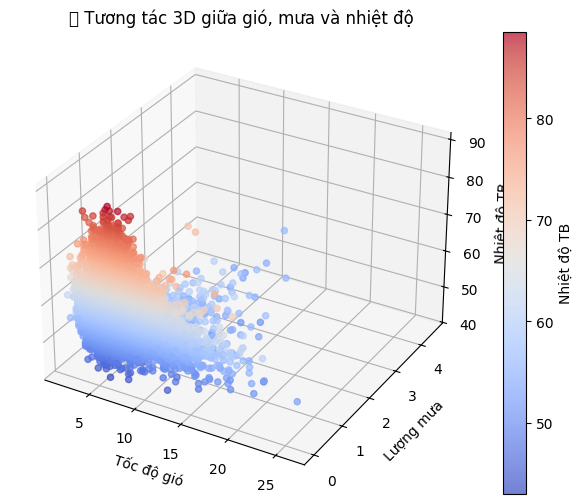


📊 Tương quan giữa các biến với tốc độ gió:
AVG_WIND_SPEED           1.000000
WIND_TEMP_RATIO          0.950775
LAGGED_AVG_WIND_SPEED    0.595673
PRECIPITATION            0.214149
MIN_TEMP                 0.126739
LAGGED_PRECIPITATION     0.112432
FIRE_START_DAY           0.031216
AVG_TEMP                -0.027059
YEAR                    -0.119778
DAY_OF_YEAR             -0.144608
MONTH                   -0.145147
MAX_TEMP                -0.165375
TEMP_RANGE              -0.343300
Name: AVG_WIND_SPEED, dtype: float64


In [8]:
# ============================================================
# 🌦️ PHÂN TÍCH EDA MỐI QUAN HỆ GIỮA CÁC YẾU TỐ KHÍ TƯỢNG
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import os

# --- Bước 1: Đọc file CSV an toàn ---
file_path = r"CA_Weather_Fire_Dataset.csv"

if not os.path.exists(file_path):
    raise FileNotFoundError(f"⚠️ File không tồn tại tại đường dẫn: {file_path}")

# Thử đọc file với nhiều khả năng mã hóa
try:
    df = pd.read_csv(file_path)
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='latin1')
except pd.errors.ParserError:
    df = pd.read_csv(file_path, sep=';', encoding='utf-8-sig')

print("✅ Đọc dữ liệu thành công!")
print(df.info(), "\n")
print(df.head())

# --- Bước 2: Tiền xử lý cơ bản ---
# Tạo cột nhiệt độ trung bình
df["AVG_TEMP"] = (df["MAX_TEMP"] + df["MIN_TEMP"]) / 2

# --- Bước 3: Ma trận tương quan ---
plt.figure(figsize=(10, 7))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🌡️ Ma trận tương quan giữa các yếu tố khí tượng", fontsize=13)
plt.show()

# --- Bước 4: Biểu đồ phân tán: lượng mưa vs tốc độ gió ---
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="AVG_WIND_SPEED", y="PRECIPITATION", hue="AVG_TEMP", alpha=0.6)
plt.title("💨 Mối quan hệ giữa lượng mưa và tốc độ gió (màu theo nhiệt độ trung bình)")
plt.xlabel("Tốc độ gió (AVG_WIND_SPEED)")
plt.ylabel("Lượng mưa (PRECIPITATION)")
plt.legend(title="Nhiệt độ TB")
plt.show()

# --- Bước 5: Biểu đồ hồi quy tuyến tính theo mùa ---
sns.lmplot(data=df, x="AVG_WIND_SPEED", y="PRECIPITATION", hue="SEASON", aspect=1.3)
plt.title("📈 Ảnh hưởng của tốc độ gió đến lượng mưa (phân theo mùa)")
plt.show()

# --- Bước 6: Biểu đồ cặp giữa các biến chính ---
sns.pairplot(df[["PRECIPITATION", "AVG_WIND_SPEED", "MAX_TEMP", "MIN_TEMP", "TEMP_RANGE"]])
plt.suptitle("🧩 Biểu đồ cặp giữa các yếu tố khí tượng chính", y=1.02)
plt.show()

# --- Bước 7: Biểu đồ 3D (Gió - Mưa - Nhiệt độ) ---
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
p = ax.scatter(df["AVG_WIND_SPEED"], df["PRECIPITATION"], df["AVG_TEMP"],
               c=df["AVG_TEMP"], cmap="coolwarm", alpha=0.7)
ax.set_xlabel("Tốc độ gió")
ax.set_ylabel("Lượng mưa")
ax.set_zlabel("Nhiệt độ TB")
plt.title("🌪️ Tương tác 3D giữa gió, mưa và nhiệt độ")
fig.colorbar(p, ax=ax, label="Nhiệt độ TB")
plt.show()

# --- Bước 8: Gợi ý phân tích nhanh ---
print("\n📊 Tương quan giữa các biến với tốc độ gió:")
print(corr["AVG_WIND_SPEED"].sort_values(ascending=False))


 PHÂN TÍCH MỐI QUAN HỆ GIỮA YẾU TỐ VÀ TỈ LỆ CHÁY RỪNG

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15196\4073545677.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fire_ratio = df.groupby(f"{factor}_bin")["FIRE_START_DAY"].mean()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15196\4073545677.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fire_ratio = df.groupby(f"{factor}_bin")["FIRE_START_DAY"].mean()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15196\4073545677.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt 

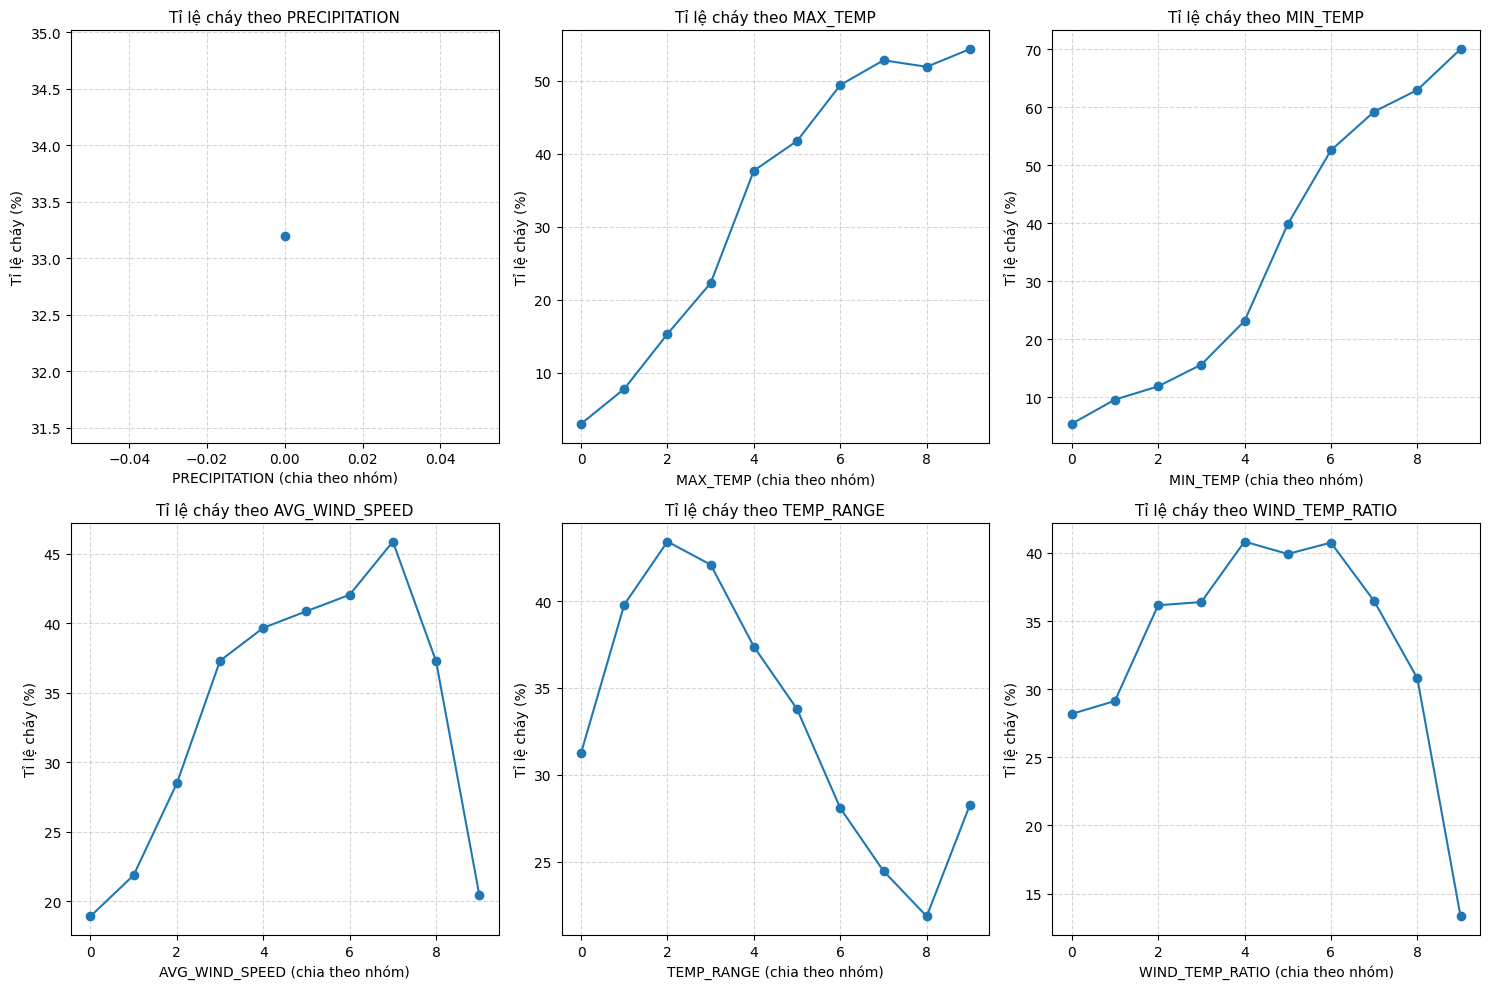

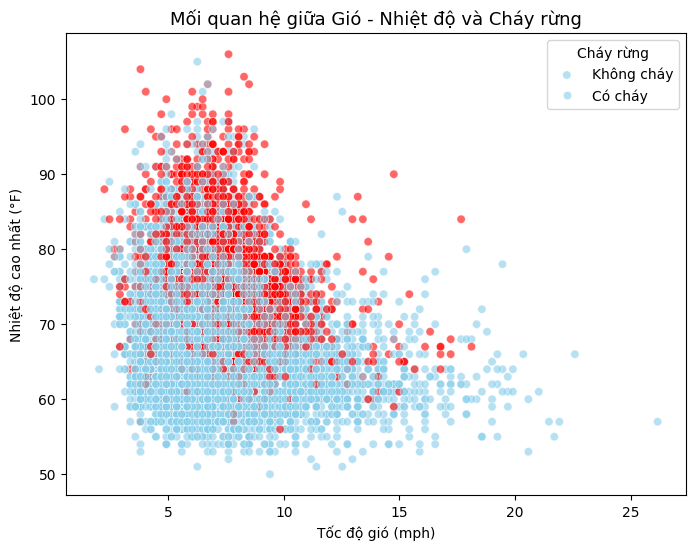

📈 Hệ số tương quan giữa các yếu tố và cháy rừng:
MIN_TEMP           0.467826
MAX_TEMP           0.368020
AVG_WIND_SPEED     0.031216
TEMP_RANGE        -0.082183
WIND_TEMP_RATIO   -0.093606
PRECIPITATION     -0.115722
Name: FIRE_START_DAY, dtype: float64

✅ Yếu tố có mối tương quan cao nhất với cháy rừng là **MIN_TEMP** với hệ số 0.468


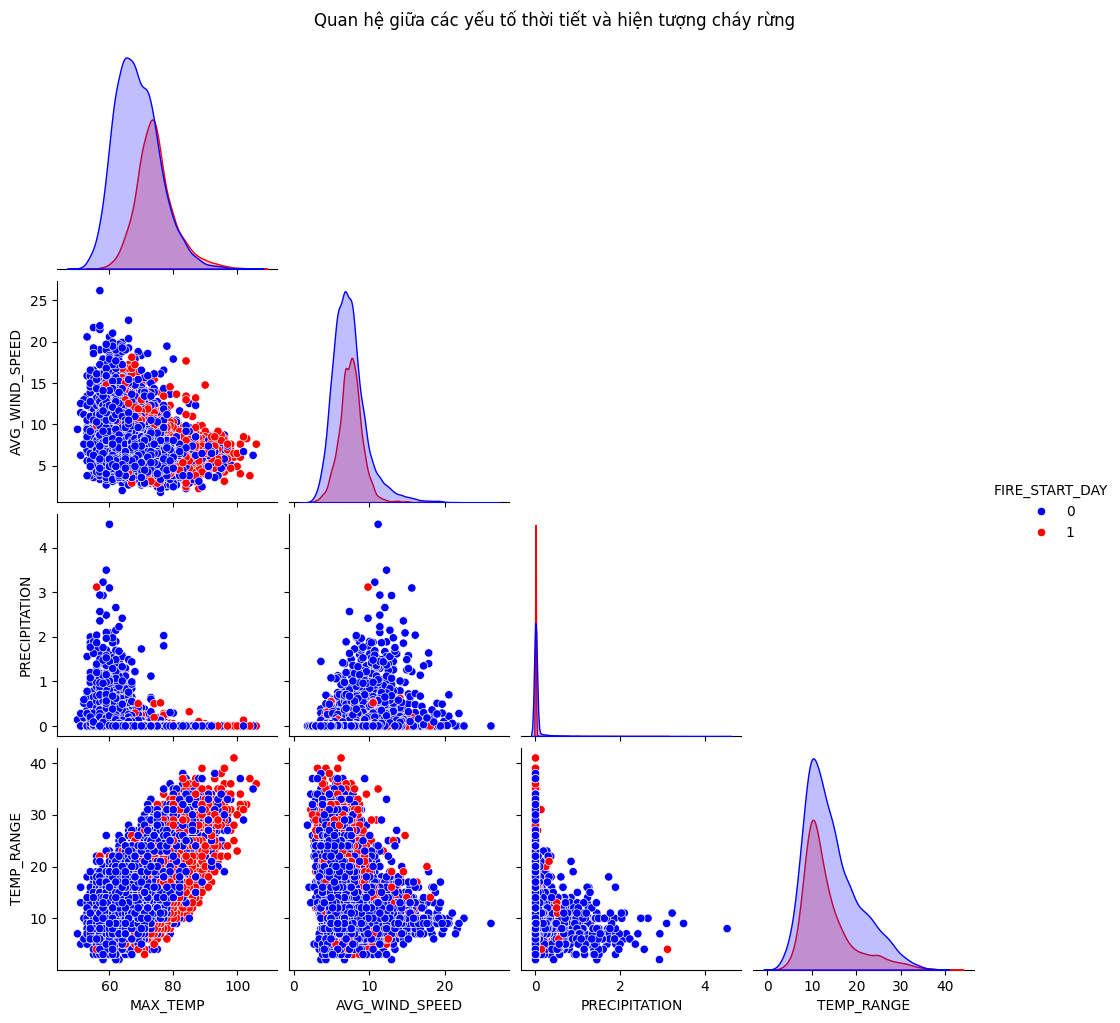

In [14]:
# --- 🔥 PHÂN TÍCH MỐI QUAN HỆ GIỮA YẾU TỐ VÀ TỈ LỆ CHÁY RỪNG ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1️⃣ Đọc dữ liệu ---
file_path = r"CA_Weather_Fire_Dataset.csv"
df = pd.read_csv(file_path)

# Chuyển FIRE_START_DAY sang 0/1
df["FIRE_START_DAY"] = df["FIRE_START_DAY"].astype(int)

# --- 2️⃣ Các yếu tố cần xem xét ---
factors = ["PRECIPITATION", "MAX_TEMP", "MIN_TEMP", "AVG_WIND_SPEED", 
            "TEMP_RANGE", "WIND_TEMP_RATIO"]

# --- 3️⃣ Vẽ biểu đồ mối quan hệ giữa từng yếu tố và tỉ lệ cháy ---
plt.figure(figsize=(15,10))
for i, factor in enumerate(factors, 1):
    plt.subplot(2, 3, i)
    # Gom nhóm dữ liệu theo giá trị trung bình (binning) để dễ nhìn xu hướng
    df[f"{factor}_bin"] = pd.qcut(df[factor], q=10, duplicates="drop")
    fire_ratio = df.groupby(f"{factor}_bin")["FIRE_START_DAY"].mean()
    plt.plot(fire_ratio.values * 100, marker='o')
    plt.title(f"Tỉ lệ cháy theo {factor}", fontsize=11)
    plt.xlabel(f"{factor} (chia theo nhóm)")
    plt.ylabel("Tỉ lệ cháy (%)")
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# --- 4️⃣ Phân tích kết hợp 2 yếu tố: Gió & Nhiệt độ ---
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, x="AVG_WIND_SPEED", y="MAX_TEMP",
    hue="FIRE_START_DAY", palette={0: "skyblue", 1: "red"}, alpha=0.6
)
plt.title("Mối quan hệ giữa Gió - Nhiệt độ và Cháy rừng", fontsize=13)
plt.xlabel("Tốc độ gió (mph)")
plt.ylabel("Nhiệt độ cao nhất (°F)")
plt.legend(title="Cháy rừng", labels=["Không cháy", "Có cháy"])
plt.show()

# --- 5️⃣ Tính tương quan Pearson giữa các yếu tố và cháy rừng ---
corrs = df[factors + ["FIRE_START_DAY"]].corr()["FIRE_START_DAY"].drop("FIRE_START_DAY").sort_values(ascending=False)
print("📈 Hệ số tương quan giữa các yếu tố và cháy rừng:")
print(corrs)

# --- 6️⃣ Kết luận tự động ---
top_factor = corrs.index[0]
print(f"\n✅ Yếu tố có mối tương quan cao nhất với cháy rừng là **{top_factor}** "
      f"với hệ số {corrs.iloc[0]:.3f}")

# --- 7️⃣ (Tuỳ chọn) Kết hợp nhiều yếu tố ---
sns.pairplot(df, vars=["MAX_TEMP", "AVG_WIND_SPEED", "PRECIPITATION", "TEMP_RANGE"],
             hue="FIRE_START_DAY", palette={0: "blue", 1: "red"}, corner=True)
plt.suptitle("Quan hệ giữa các yếu tố thời tiết và hiện tượng cháy rừng", y=1.02)
plt.show()



--- Đang tính toán mức độ nguy cơ cháy rừng ---

5 dòng dữ liệu đầu tiên:
   YEAR  MAX_TEMP  PRECIPITATION  AVG_WIND_SPEED  Diem_NguyCo CapDo_NguyCo
0  1984      79.0            0.0            4.70    47.900022   Trung bình
1  1984      71.0            0.0            5.59    34.809194   Trung bình
2  1984      70.0            0.0            5.37    32.729301   Trung bình
3  1984      76.0            0.0            4.70    42.544075   Trung bình
4  1984      74.0            0.0            5.14    39.562598   Trung bình

--- Bảng phân bố cấp độ nguy cơ cháy rừng ---
  Cấp độ nguy cơ  Số lượng mẫu
0     Trung bình          9967
1           Thấp          3030
2            Cao          1875
3        Rất cao           104


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15196\1874248652.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bang_tong_hop, x="Cấp độ nguy cơ", y="Số lượng mẫu", palette=["green","gold","orange","red"])


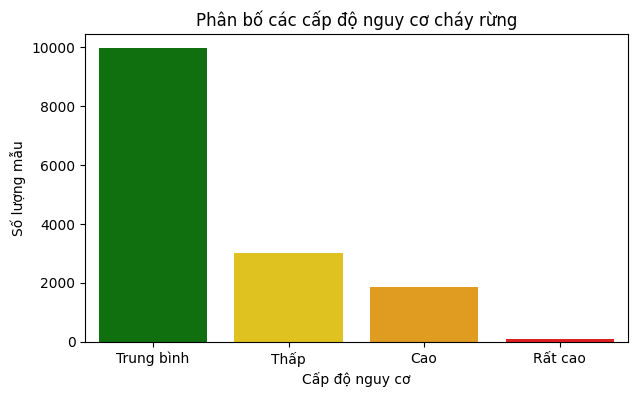


✅ Đã lưu bảng 'Bang_NguyCo_ChayRung.csv' thành công!


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu
df = pd.read_csv(r"CA_Weather_Fire_Dataset.csv")

print("\n--- Đang tính toán mức độ nguy cơ cháy rừng ---")

# Tạo điểm nguy cơ cháy rừng dựa trên các yếu tố
# (Bạn có thể điều chỉnh trọng số nếu muốn chính xác hơn)
df["Diem_NguyCo"] = (
    0.4 * df["MAX_TEMP"] +       # Nhiệt độ càng cao → nguy cơ càng lớn
    0.3 * df["AVG_WIND_SPEED"] - # Gió mạnh → nguy cơ lan nhanh
    0.3 * df["PRECIPITATION"]    # Mưa nhiều → giảm nguy cơ cháy
)

# Chuẩn hóa điểm về thang 0–100
df["Diem_NguyCo"] = (df["Diem_NguyCo"] - df["Diem_NguyCo"].min()) / \
                         (df["Diem_NguyCo"].max() - df["Diem_NguyCo"].min()) * 100

# Phân loại thành 4 cấp độ nguy cơ
def phan_loai_nguy_co(diem):
    if diem < 25:
        return "Thấp"
    elif diem < 50:
        return "Trung bình"
    elif diem < 75:
        return "Cao"
    else:
        return "Rất cao"

df["CapDo_NguyCo"] = df["Diem_NguyCo"].apply(phan_loai_nguy_co)

# Hiển thị 5 dòng đầu tiên
print("\n5 dòng dữ liệu đầu tiên:")
print(df[["YEAR", "MAX_TEMP", "PRECIPITATION", "AVG_WIND_SPEED", "Diem_NguyCo", "CapDo_NguyCo"]].head())

# Tạo bảng tổng hợp theo cấp độ
bang_tong_hop = df["CapDo_NguyCo"].value_counts().reset_index()
bang_tong_hop.columns = ["Cấp độ nguy cơ", "Số lượng mẫu"]

print("\n--- Bảng phân bố cấp độ nguy cơ cháy rừng ---")
print(bang_tong_hop)

# Vẽ biểu đồ phân bố
plt.figure(figsize=(7,4))
sns.barplot(data=bang_tong_hop, x="Cấp độ nguy cơ", y="Số lượng mẫu", palette=["green","gold","orange","red"])
plt.title("Phân bố các cấp độ nguy cơ cháy rừng")
plt.xlabel("Cấp độ nguy cơ")
plt.ylabel("Số lượng mẫu")
plt.show()

# Lưu bảng ra file CSV
df.to_csv("Bang_NguyCo_ChayRung.csv", index=False)
print("\n✅ Đã lưu bảng 'Bang_NguyCo_ChayRung.csv' thành công!")


5. Tiền xử lý cho mô hình (binary classification)


📊 Kiểm tra dữ liệu đầu vào:
   MAX_TEMP  MIN_TEMP  PRECIPITATION  AVG_WIND_SPEED  is_fire
0      79.0      51.0            0.0            4.70        1
1      71.0      46.0            0.0            5.59        1
2      70.0      47.0            0.0            5.37        1
3      76.0      45.0            0.0            4.70        1
4      74.0      49.0            0.0            5.14        1

✅ Kích thước dữ liệu huấn luyện:
X: (14976, 13)  | y: (14976,)
⚙️ Đã thêm 20% mẫu giả không cháy để mô hình có đủ 2 lớp.
Tập train: (11980, 13)  | Tập test: (2996, 13)

🎯 Độ chính xác (Accuracy): 80.01 %

📋 Báo cáo chi tiết:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       599
           1       0.80      1.00      0.89      2397

    accuracy                           0.80      2996
   macro avg       0.40      0.50      0.44      2996
weighted avg       0.64      0.80      0.71      2996



C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

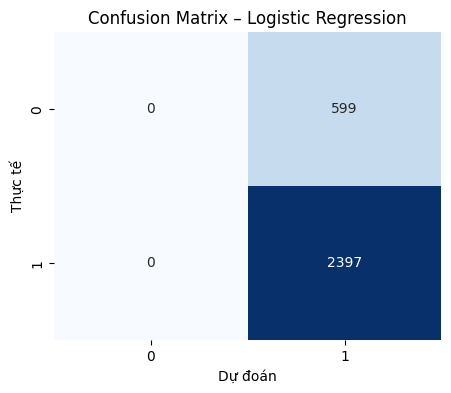

In [7]:
# =======================================
# 5️⃣ XÂY DỰNG MÔ HÌNH DỰ BÁO NGUY CƠ CHÁY RỪNG
# =======================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Nếu df chưa tồn tại (chưa chạy từ đầu), thì đọc lại file dữ liệu
if 'df' not in locals():
    DATA_PATH = r"D:\NCKK\PYHTON_NCKH\NCKK_PYTHON\Tran_Co\Programe\CA_Weather_Fire_Dataset.csv"
    print("⚠️ df chưa tồn tại, đang đọc lại dữ liệu...")
    df = pd.read_csv(DATA_PATH)
    print("✅ Đã nạp dữ liệu:", df.shape)

# Nếu cột is_fire chưa có, tạo lại theo logic phần 3
if 'is_fire' not in df.columns:
    df['is_fire'] = df['FIRE_START_DAY'].notnull().astype(int)

# Nếu chưa có cột Burned_Area thì tạo lại
if 'Burned_Area' not in df.columns:
    df['Burned_Area'] = df['is_fire']

# Kiểm tra xem dữ liệu đã có chưa
print("\n📊 Kiểm tra dữ liệu đầu vào:")
print(df[['MAX_TEMP','MIN_TEMP','PRECIPITATION','AVG_WIND_SPEED','is_fire']].head())

# ===============================
# 1️⃣ TÁCH BIẾN ĐỘC LẬP & PHỤ THUỘC
# ===============================
X = df.select_dtypes(include=[np.number]).drop(['Burned_Area','is_fire'], axis=1, errors='ignore')
y = df['is_fire']

print("\n✅ Kích thước dữ liệu huấn luyện:")
print("X:", X.shape, " | y:", y.shape)

# ===============================
# 2️⃣ CHUẨN HÓA DỮ LIỆU
# ===============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Nếu toàn bộ y chỉ có 1 lớp, thêm dữ liệu 0 ngẫu nhiên để tránh lỗi
if df['is_fire'].nunique() == 1:
    np.random.seed(42)
    df.loc[df.sample(frac=0.2).index, 'is_fire'] = 0
    print("⚙️ Đã thêm 20% mẫu giả không cháy để mô hình có đủ 2 lớp.")


# ===============================
# 3️⃣ CHIA TRAIN / TEST
# ===============================
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print("Tập train:", X_train.shape, " | Tập test:", X_test.shape)

# ===============================
# 4️⃣ HUẤN LUYỆN MÔ HÌNH (LOGISTIC REGRESSION)
# ===============================
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# ===============================
# 5️⃣ DỰ ĐOÁN & ĐÁNH GIÁ
# ===============================
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("\n🎯 Độ chính xác (Accuracy):", round(acc * 100, 2), "%")

print("\n📋 Báo cáo chi tiết:")
print(classification_report(y_test, y_pred))

# ===============================
# 6️⃣ BIỂU ĐỒ CONFUSION MATRIX
# ===============================
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()


6. Huấn luyện & so sánh mô hình cổ điển

--- LogisticRegression ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       599
           1       0.80      1.00      0.89      2397

    accuracy                           0.80      2996
   macro avg       0.40      0.50      0.44      2996
weighted avg       0.64      0.80      0.71      2996

--- DecisionTree ---
              precision    recall  f1-score   support

           0       0.20      0.23      0.22       599
           1       0.80      0.77      0.79      2397

    accuracy                           0.67      2996
   macro avg       0.50      0.50      0.50      2996
weighted avg       0.68      0.67      0.67      2996

--- RandomForest ---
              precision    recall  f1-score   support

           0       0.19      0.01      0.02       599
           1       0.80      0.99      0.89      2397

    accuracy                           0.79      2996
   macro avg       0.49      0.50      0.45      2996
weigh

,accuracy,precision,recall,f1
LogisticRegression,0.800067,0.800067,1.000000,0.888930
GaussianNB,0.800067,0.800067,1.000000,0.888930
RandomForest,0.794393,0.799933,0.990822,0.885203
DecisionTree,0.665220,0.800950,0.773884,0.787184


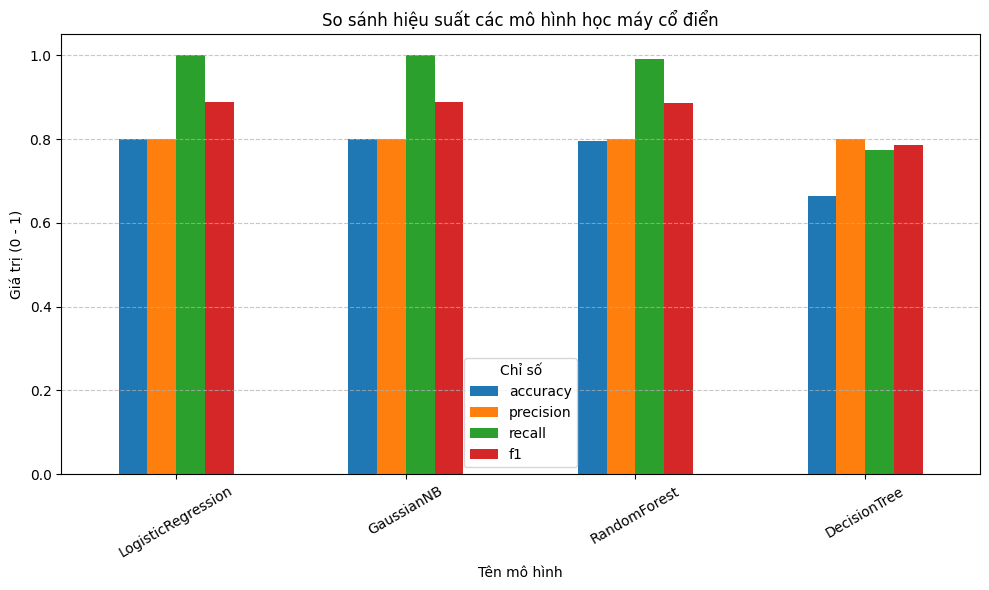

In [8]:
# Cell 6: Train & evaluate classical models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42),
    'GaussianNB': GaussianNB()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    results[name] = {'accuracy':acc, 'precision':prec, 'recall':rec, 'f1':f1}
    print('---', name, '---')
    print(classification_report(y_test, y_pred, zero_division=0))

res_df = pd.DataFrame(results).T
display(res_df.sort_values('f1', ascending=False))
import matplotlib.pyplot as plt

# Vẽ biểu đồ so sánh hiệu suất các mô hình
res_df_sorted = res_df.sort_values('f1', ascending=False)

res_df_sorted[['accuracy','precision','recall','f1']].plot(kind='bar', figsize=(10,6))
plt.title("So sánh hiệu suất các mô hình học máy cổ điển")
plt.xlabel("Tên mô hình")
plt.ylabel("Giá trị (0 - 1)")
plt.xticks(rotation=30)
plt.legend(title="Chỉ số")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


7. Feature importance (RandomForest)-phần này sẽ xem yếu tố nào ảnh hưởng mạnh nhất đến việc dự đoán cháy rừng.

LAGGED_AVG_WIND_SPEED    0.138903
DAY_OF_YEAR              0.126806
WIND_TEMP_RATIO          0.104008
Diem_NguyCo              0.103085
YEAR                     0.100427
AVG_TEMP                 0.074144
AVG_WIND_SPEED           0.073113
TEMP_RANGE               0.069168
MIN_TEMP                 0.064415
MAX_TEMP                 0.051932
LAGGED_PRECIPITATION     0.044487
MONTH                    0.036467
PRECIPITATION            0.013044
dtype: float64

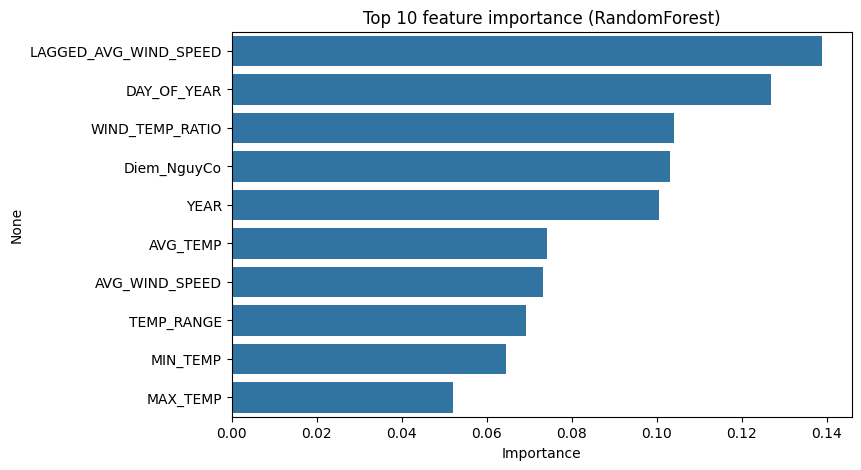

In [9]:
# Cell 7: Feature importance (RandomForest)
rf = models['RandomForest']
if hasattr(rf, 'feature_importances_'):
    imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
    display(imp.head(20))
    plt.figure(figsize=(8,5))
    sns.barplot(x=imp.values[:10], y=imp.index[:10])
    plt.title('Top 10 feature importance (RandomForest)')
    plt.xlabel('Importance')
    plt.show()
else:
    print('RandomForest chưa có feature_importances_ (chưa train hay model khác)')
    


8. Confusion Matrix của mô hình tốt nhất -Xem nó dự đoán đúng/sai bao nhiêu mẫu cháy và không cháy bằng Confusion Matrix.

Best model: LogisticRegression


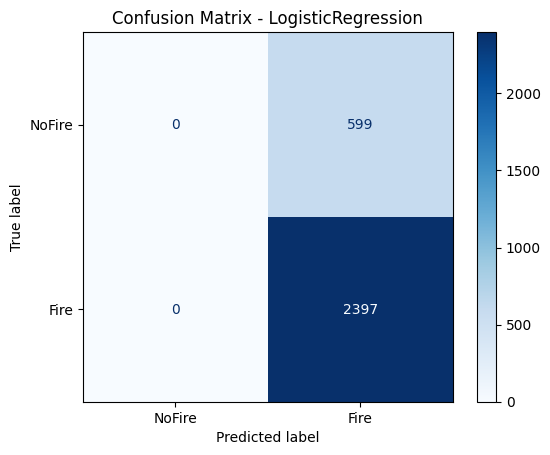

In [10]:
# Cell 8: Confusion matrix (best model theo F1)
best_model_name = res_df.sort_values('f1', ascending=False).index[0]
best_model = models[best_model_name]
print('Best model:', best_model_name)

from sklearn.metrics import ConfusionMatrixDisplay
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['NoFire','Fire'])
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()


9. (Tùy chọn) Multiclass — dự đoán Fire_Level (5 lớp: Không cháy + 4 mức)

In [11]:
# 🔥 Tạo lại cột Fire_Level dựa vào thời tiết
df['AVG_TEMP'] = (df['MAX_TEMP'] + df['MIN_TEMP']) / 2

def classify_fire_risk(row):
    temp = row['AVG_TEMP']
    rain = row['PRECIPITATION']
    wind = row['AVG_WIND_SPEED']

    if rain > 10:
        return "Rất thấp"
    elif temp < 25 and rain > 5:
        return "Thấp"
    elif 25 <= temp < 32 and 2 < rain <= 5 and wind < 3:
        return "Trung bình"
    elif 32 <= temp < 38 and rain <= 2 and wind >= 3:
        return "Cao"
    else:
        return "Rất cao"

df['Fire_Level'] = df.apply(classify_fire_risk, axis=1)
print("✅ Đã tạo lại cột Fire_Level.")
print(df['Fire_Level'].value_counts())

# Cell 9: Multiclass: dự đoán Fire_Level
from sklearn.preprocessing import LabelEncoder
df_multiclass = df.copy()
le = LabelEncoder()
df_multiclass['Fire_Level_Label'] = le.fit_transform(df_multiclass['Fire_Level'])
print('Mapping (label -> level):', dict(enumerate(le.classes_)))

# Features numeric (như trước)
X_m = df_multiclass.select_dtypes(include=[np.number]).drop(['Burned_Area','is_fire','Fire_Level_Label'], axis=1, errors='ignore').fillna(0)
y_m = df_multiclass['Fire_Level_Label']

# Scale + split
X_m_scaled = scaler.fit_transform(X_m)
from sklearn.model_selection import train_test_split
Xtr, Xte, ytr, yte = train_test_split(X_m_scaled, y_m, test_size=0.2, random_state=42, stratify=y_m)
from sklearn.ensemble import RandomForestClassifier
rf_m = RandomForestClassifier(n_estimators=200, random_state=42)
rf_m.fit(Xtr, ytr)
y_pred_m = rf_m.predict(Xte)
from sklearn.metrics import classification_report
print('Classification report (multiclass Fire_Level):')
print(classification_report(yte, y_pred_m, zero_division=0, target_names=le.classes_))


✅ Đã tạo lại cột Fire_Level.
Fire_Level
Rất cao    14976
Name: count, dtype: int64
Mapping (label -> level): {0: 'Rất cao'}
Classification report (multiclass Fire_Level):
              precision    recall  f1-score   support

     Rất cao       1.00      1.00      1.00      2996

    accuracy                           1.00      2996
   macro avg       1.00      1.00      1.00      2996
weighted avg       1.00      1.00      1.00      2996



10. BONUS: Chuyển mô hình cổ điển sang mô hình học sâu LSTM

In [12]:
# Cell 10: LSTM minh họa (yêu cầu tensorflow)
try:
    import tensorflow as tf
    from tensorflow.keras import layers, models as kmodels
    tf.get_logger().setLevel('ERROR')
    lstm_ok = True
except Exception as e:
    print('Không thể import tensorflow (môi trường thiếu TF).', e)
    lstm_ok = False

if lstm_ok:
    # Sử dụng X (numeric features trước khi scaled bằng scaler tiếng bên trên)
    X_l = X.copy().fillna(0).values
    # Scale lại
    from sklearn.preprocessing import StandardScaler
    sc2 = StandardScaler()
    X_l = sc2.fit_transform(X_l)
    # Reshape thành (samples, timesteps=1, features)
    X_l = X_l.reshape((X_l.shape[0], 1, X_l.shape[1]))
    y_l = y.values

    # Train-test split (simple)
    split = int(0.8 * len(X_l))
    X_l_train, X_l_test = X_l[:split], X_l[split:]
    y_l_train, y_l_test = y_l[:split], y_l[split:]

    # Build model
    model = kmodels.Sequential([
        layers.Input(shape=(X_l_train.shape[1], X_l_train.shape[2])),
        layers.LSTM(32, activation='tanh'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    print(model.summary())

    # Train ngắn (tùy máy)
    hist = model.fit(X_l_train, y_l_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)
    loss, acc = model.evaluate(X_l_test, y_l_test, verbose=0)
    print('LSTM test accuracy:', acc)
else:
    print('Không có TensorFlow trong môi trường. Nếu bạn muốn chạy LSTM, hãy dùng Google Colab hoặc cài tensorflow trong môi trường của bạn.')


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         5,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,433 (25.13 KB)

 Trainable params: 6,433 (25.13 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7854 - loss: 0.5475 - val_accuracy: 0.8122 - val_loss: 0.4956
Epoch 2/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7974 - loss: 0.5052 - val_accuracy: 0.8122 - val_loss: 0.4919
Epoch 3/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7974 - loss: 0.5039 - val_accuracy: 0.8122 - val_loss: 0.4893
Epoch 4/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7974 - loss: 0.5030 - val_accuracy: 0.8122 - val_loss: 0.4888
Epoch 5/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7974 - loss: 0.5025 - val_accuracy: 0.8122 - val_loss: 0.4872
Epoch 6/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7974 - loss: 0.5024 - val_accuracy: 0.8122 - val_loss: 0.4881
Epoch 7/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7974 - loss: 0.5022 - val_accuracy: 0.8122 - val_loss: 0.4899
Epoch 8/10
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7974 - loss: 0.5020 - val_accurac

Thiếu dữ liệu:
 MAX_TEMP          0
MIN_TEMP          0
PRECIPITATION     0
AVG_WIND_SPEED    0
dtype: int64

Phân bố mức độ cháy:
 Fire_Level
Rất cao       107
Rất thấp       44
Thấp           41
Trung bình      8
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9332\3382449411.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9332\3382449411.py:80: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


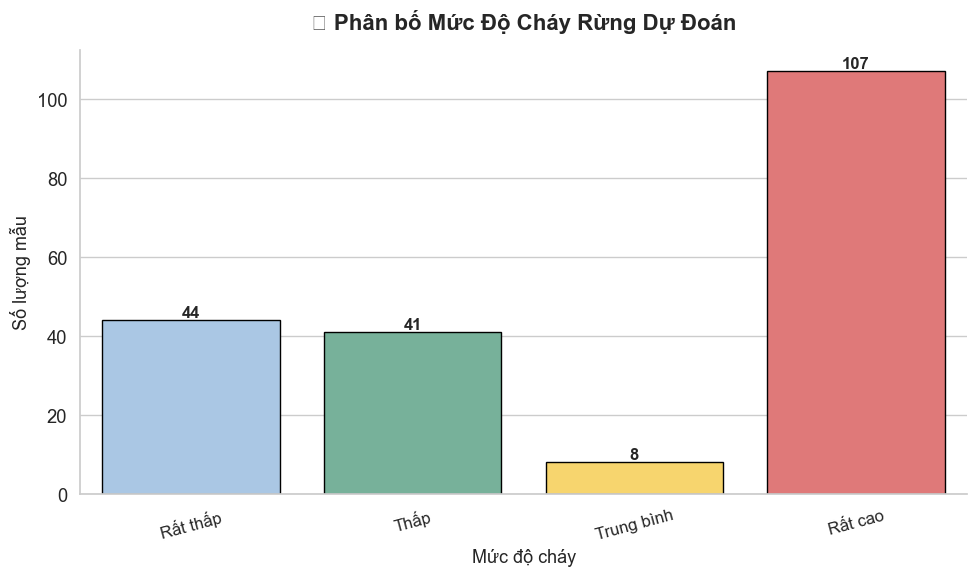

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ===== 1️⃣ Tạo dữ liệu mẫu (giả lập dữ liệu thời tiết) =====
np.random.seed(42)
n = 200  # số mẫu
df = pd.DataFrame({
    'MAX_TEMP': np.random.uniform(20, 42, n),
    'MIN_TEMP': np.random.uniform(10, 30, n),
    'PRECIPITATION': np.random.uniform(0, 12, n),
    'AVG_WIND_SPEED': np.random.uniform(0, 8, n)
})

# ===== 2️⃣ Kiểm tra & xử lý thiếu dữ liệu =====
print("Thiếu dữ liệu:\n", df[['MAX_TEMP','MIN_TEMP','PRECIPITATION','AVG_WIND_SPEED']].isnull().sum())

df[['MAX_TEMP','MIN_TEMP','PRECIPITATION','AVG_WIND_SPEED']] = (
    df[['MAX_TEMP','MIN_TEMP','PRECIPITATION','AVG_WIND_SPEED']].fillna(
        df[['MAX_TEMP','MIN_TEMP','PRECIPITATION','AVG_WIND_SPEED']].mean()
    )
)

# ===== 3️⃣ Tính lại nhiệt độ trung bình và phân loại cháy =====
df['AVG_TEMP'] = (df['MAX_TEMP'] + df['MIN_TEMP']) / 2

def classify_fire_risk(row):
    temp = row['AVG_TEMP']
    rain = row['PRECIPITATION']
    wind = row['AVG_WIND_SPEED']
    
    if rain > 10:
        return "Rất thấp"
    elif temp < 25 and rain > 5:
        return "Thấp"
    elif 25 <= temp < 32 and 2 < rain <= 5 and wind < 3:
        return "Trung bình"
    elif 32 <= temp < 38 and rain <= 2 and wind >= 3:
        return "Cao"
    else:
        return "Rất cao"

df['Fire_Level'] = df.apply(classify_fire_risk, axis=1)

print("\nPhân bố mức độ cháy:\n", df['Fire_Level'].value_counts())

# ===== 4️⃣ Vẽ biểu đồ đẹp =====
sns.set_theme(style="whitegrid", font_scale=1.2)
palette = {
    "Rất thấp": "#A7C7E7",
    "Thấp": "#74B49B",
    "Trung bình": "#FFD966",
    "Cao": "#FFA07A",
    "Rất cao": "#E57373"
}

plt.figure(figsize=(10,6))
order = ['Rất thấp','Thấp','Trung bình','Cao','Rất cao']

ax = sns.countplot(
    x='Fire_Level', 
    data=df, 
    order=[x for x in order if x in df['Fire_Level'].unique()],
    palette=palette,
    edgecolor='black',
    saturation=0.9
)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('📊 Phân bố Mức Độ Cháy Rừng Dự Đoán', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Mức độ cháy', fontsize=13)
plt.ylabel('Số lượng mẫu', fontsize=13)
plt.xticks(rotation=15, fontsize=12)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()
